In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def calc_D(sim, planet=1):
    D =(sim.particles[planet].y - sim.particles[0].y) * (sim.particles[planet].vy - sim.particles[0].vy) 
    + (sim.particles[planet].z - sim.particles[0].z) * (sim.particles[planet].vz - sim.particles[0].vz)
    return D

In [3]:
def bisect(sim,t1,t2):
    tm = (t1+t2)/2.
    if t2-t1<(1.0e-10):
        return tm
    sim.integrate(tm)
    D = calc_D(sim, 1)
    if D>0.:
        t2 = tm
        return bisect(sim,t1,t2)
    else:
        t1 = tm
        return bisect(sim,t1,t2)

In [4]:
#http://www.openexoplanetcatalogue.com/planet/WASP-47%20c/
sim = rebound.Simulation()
sim.add(m=1.)
planet1_params = {"a":0.0510, "m":(0.0009543*1.16)} #w47-b
planet2_params = {"a":0.0170, "m":(0.0009543*0.038)} #w47-e
planet3_params = {"a":0.0880, "m":(0.0009543*0.03)} #w47-d
planet4_params = {"a":1.36, "m":(0.0009543*1.2), "e":0.13} #w47-c
sim.add(primary=sim.particles[0], **planet1_params)
sim.add(primary=sim.particles[0], **planet2_params)
sim.add(primary=sim.particles[0], **planet3_params)
sim.add(primary=sim.particles[0], **planet4_params)
#print sim.particles[1].xyz
#sim.move_to_com()

In [5]:
#This is code to plot D(t)
#d_array = np.zeros(100)
#for i in range(100):
#    sim.step()
#    d_array[i] = calc_D(sim, 1)
#    
#fig = plt.figure(figsize=(10,5))
#ax = plt.subplot(111)
#ax.plot(np.arange(100), d_array)
#plt.show()
#print sim.t

In [6]:
transits = 16
transits_var = 0
D_previous = 1.
time_previous = sim.t-0.01
transit_times = np.zeros(transits)
position_data = np.zeros((0,3))
time_data = np.zeros(0)
while(transits_var < transits):
    sim.step()
    position_data = np.append(position_data, [sim.particles[1].xyz], axis=0)
    time_data = np.append(time_data, sim.t)
    D = calc_D(sim, 1)
    if(D>0 and D_previous<0 and sim.particles[1].x>0):
        transit_times[transits_var] = bisect(sim, time_previous, sim.t)
        #print sim.particles[1].xyz
        sim.integrate(sim.t + 0.001)
        transits_var += 1
    time_previous = sim.t
    D_previous = D
    
#print transit_times

[[ 0.05080788  0.00442496  0.        ]
 [ 0.05063896  0.00606096  0.        ]
 [ 0.05040245  0.00778841  0.        ]
 ..., 
 [ 0.05147392  0.00439368  0.        ]
 [ 0.0515078   0.0060946   0.        ]
 [ 0.05148302  0.00786023  0.        ]]


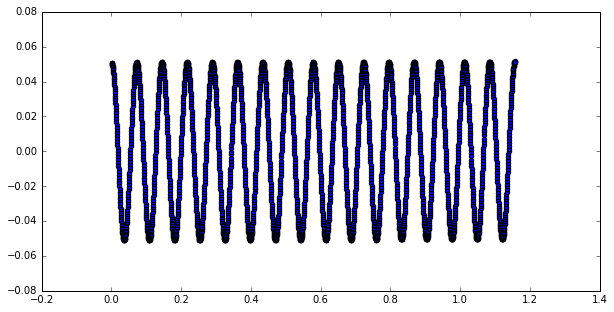

In [7]:
print position_data
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.scatter(time_data, position_data[:,0])
plt.show()
#confirming how many transits we should see based on xyz

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(transits),transit_times)

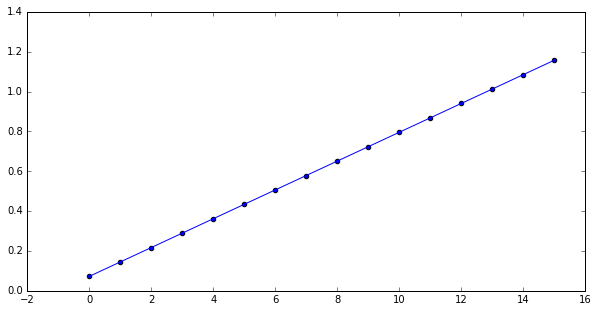

In [9]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.scatter(np.arange(transits), transit_times, marker="o")
lin = np.arange(transits)*slope + intercept
ax.plot(np.arange(transits), lin)
plt.show()

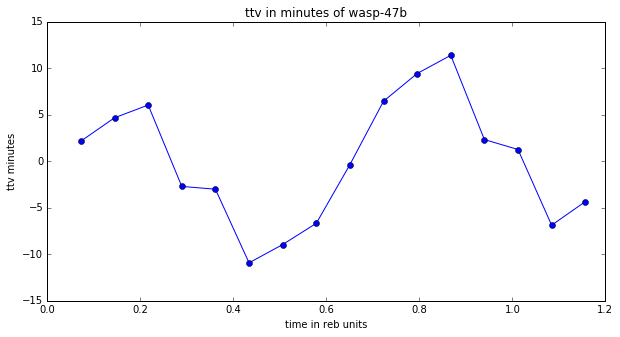

[ 0.07229858  0.14459852  0.21689881  0.28920217  0.36150296  0.43380607
  0.50610618  0.57840619  0.65070499  0.72300363  0.79530343  0.86760355
  0.93990699  1.01220802  1.08451119  1.15681113]
[ 0.07229923  0.14459994  0.21690065  0.28920135  0.36150206  0.43380276
  0.50610347  0.57840417  0.65070488  0.72300559  0.79530629  0.867607
  0.9399077   1.01220841  1.08450911  1.15680982]


In [10]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
diff = (np.arange(transits)*slope + intercept) - transit_times
diff_in_minutes = diff*2*np.pi*3.154e7*(1./60.) #multiply by 2pi, seconds in a year. Then divide by 60 for minutes.
ax.plot(transit_times, diff_in_minutes, marker="o")
ax.set_title("ttv in minutes of wasp-47b")
plt.xlabel("time in reb units")
plt.ylabel("ttv minutes")
plt.show()
print transit_times
print (np.arange(transits)*slope + intercept)

In [11]:
print sim.status()

---------------------------------
REBOUND version:     	3.4.0
REBOUND built on:    	May 17 2017 12:41:23
Number of particles: 	5
Selected integrator: 	ias15
Simulation time:     	1.1578111332793002e+00
Current timestep:    	0.000393
---------------------------------
<rebound.Particle object, m=1.0 x=0.000503378738244 y=0.00625886888653 z=0.0 vx=0.00150675486748 vy=0.000550813752732 vz=0.0>
<rebound.Particle object, m=0.001106988 x=0.0513162066858 y=0.01068314684 z=0.0 vx=-0.383705597601 vy=4.41365888662 vz=0.0>
<rebound.Particle object, m=3.62634e-05 x=0.0106382286059 y=0.0199085091261 z=0.0 vx=-6.15561649941 vy=4.57230655564 vz=0.0>
<rebound.Particle object, m=2.8629e-05 x=0.0667550292379 y=0.0640069683678 z=0.0 vx=-2.21502914284 vy=2.5470293359 vz=0.0>
<rebound.Particle object, m=0.00114516 x=0.744056252819 y=0.991576903955 z=0.0 vx=-0.69454025875 vy=0.631817588688 vz=0.0>
---------------------------------
None


In [12]:
import ttvfast

In [13]:
params = [
        0.000295994511,
        0.95573417954,
        0.00002878248,
        1.0917340278625494e+01,
        5.6159310042858110e-02,
        9.0921164935951211e+01,
        -1.1729336712101943e-18,
        1.8094838714599581e+02,
        -8.7093652691581923e+01,
        0.00061895914,
        2.2266898036209028e+01,
        5.6691301931178648e-02,
        8.7598285693573246e+01,
        4.6220554014026838e-01,
        1.6437004273382669e+00,
        -1.9584857031843157e+01]

Time = -1045
dt = 0.54
Total = 1700
n_plan = 2
input_flag = 0

In [14]:
planet1 = ttvfast.models.Planet(*params[2:2 + 7])
planet2 = ttvfast.models.Planet(*params[2 + 7:])
gravity, stellar_mass = params[0:2]
planets = [planet1, planet2]
#assert 0.9 < stellar_mass < 1.0
results = ttvfast.ttvfast(planets, stellar_mass, Time, dt, Totalx`)

In [15]:
print results

{'positions': ([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 

In [16]:
integer_indices, epochs, times, rsky, vsky = results["positions"]
print times

[-1044.9217072632036, -1038.7250880133624, -1033.9950102849032, -1023.0721598388927, -1016.459734143501, -1012.1481122663986, -1001.2290039970867, -994.1941435811713, -990.3074035154176, -979.3911529357173, -971.9284251351652, -968.4721182828133, -957.5581707332564, -949.6626248406413, -946.6419364038113, -935.7298654959014, -927.396753747853, -924.8165904903742, -913.9059060661002, -905.1308223123203, -902.9954594248593, -892.0853748240206, -882.864875232579, -881.177097642182, -870.2663901178503, -860.5990271873553, -859.3589706780987, -848.4458027861999, -838.3334875607922, -837.5371142425579, -826.6190613608594, -816.0685763963266, -815.7061711985341, -804.780349182562, -793.859679295282, -793.804721423879, -782.9230780864206, -771.990762299919, -771.5424170191347, -761.04078429425, -750.0932796766948, -749.2821267555629, -739.1283294202619, -728.163196788218, -727.0241668514223, -717.18309503984, -706.1995839891824, -704.7686200536613, -695.2057834597985, -684.2050926510884, -682.

In [17]:
ttimes = times[:375]

In [18]:
tinteger_indices = integer_indices[:375]

In [19]:
print tinteger_indices

[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 

In [44]:
t1_times = []
t2_times = []
for i in range(375):
    if(tinteger_indices[i]==0):
        t1_times.append(ttimes[i])
    else:
        t2_times.append(ttimes[i])
        
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(len(t1_times)),t1_times)

<IPython.core.display.Javascript object>


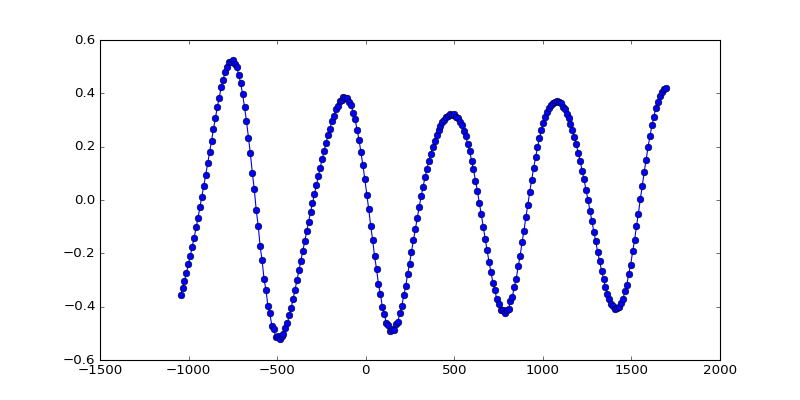

In [45]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
diff = (np.arange(len(t1_times))*slope + intercept) - np.asarray(t1_times)
#diff_in_minutes = diff*2*np.pi*3.154e7*(1./60.) #multiply by 2pi, seconds in a year. Then divide by 60 for minutes.
ax.plot(t1_times, diff, marker="o")
plt.show()

In [72]:
params = [
        0.000295994511,
        0.95573417954,
        0.00002878248,
        1.0917340278625494e+01,
        5.6159310042858110e-02,
        9.0921164935951211e+01-90.,
        -1.1729336712101943e-18,
        1.8094838714599581e+02,
        -8.7093652691581923e+01,
        0.00061895914,
        2.2266898036209028e+01,
        5.6691301931178648e-02,
        8.7598285693573246e+01-90.,
        4.6220554014026838e-01,
        1.6437004273382669e+00,
        -1.9584857031843157e+01]
sim = rebound.Simulation()
sim.add(m=0.95573417954)
#a1 = np.sqrt(params[3]**3.)
#a2 = np.sqrt(params[10]**3.)
planet1_params = {"P":params[3]*(2*np.pi/365.), "m":params[2], 'e':params[4], 'inc':params[5]*(2*np.pi/360.), 'Omega':params[6]*(2*np.pi/360.)+3*np.pi/2., 'omega':params[7]*(2*np.pi/360.),'M':params[8]*(2*np.pi/360.)} 
planet2_params = {"P":params[10]*(2*np.pi/365.), "m":params[9], 'e':params[11], 'inc':params[12]*(2*np.pi/360.), 'Omega':params[13]*(2*np.pi/360.)+3*np.pi/2., 'omega':params[14]*(2*np.pi/360.),'M':params[15]*(2*np.pi/360.)}
sim.add(primary=sim.particles[0], **planet1_params)
sim.add(primary=sim.particles[0], **planet2_params)

In [73]:
transits = 280
transits_var = 0
D_previous = 1.
time_previous = sim.t-0.01
transit_times = np.zeros(transits)
position_data = np.zeros((0,3))
position_data2 = np.zeros((0,3))
time_data = np.zeros(0)
while(transits_var < transits):
    #print 1
    sim.step()
    position_data = np.append(position_data, [sim.particles[1].xyz], axis=0)
    position_data2 = np.append(position_data, [sim.particles[1].xyz], axis=0)
    time_data = np.append(time_data, sim.t)
    #print 2
    D = calc_D(sim, 1)
    #print "D value = {d}".format(d=D)
    if(D>0 and D_previous<0 and sim.particles[1].x>0):
        transit_times[transits_var] = bisect(sim, time_previous, sim.t)
        #print sim.particles[1].xyz
        sim.integrate(sim.t + 0.001)
        #print 4
        transits_var += 1
    time_previous = sim.t
    D_previous = D
    if(transits_var % 10 == 1):
        print "transits_var = {v}".format(v=transits_var)
    
#print transit_times

transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 1
transits_var = 11
transits_var = 11
transits_var = 11
transits_var = 11
transits_var = 11
transits_

<IPython.core.display.Javascript object>


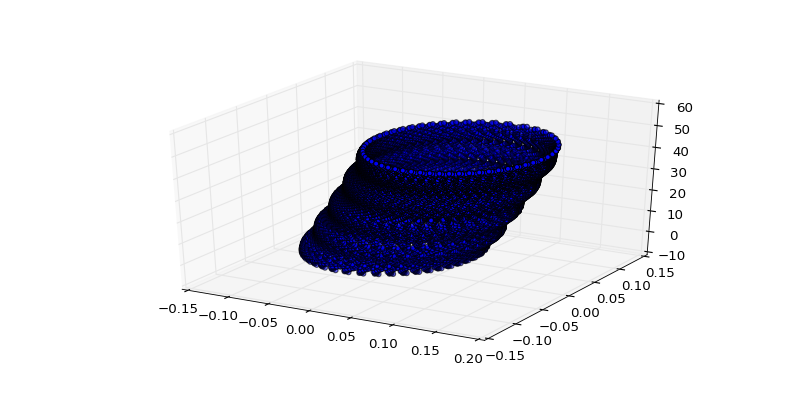

In [74]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(position_data[:,0], position_data[:,1], time_data)
plt.show()

In [75]:
#print transit_times*365./(2*np.pi)

In [76]:
#print t1_times

<IPython.core.display.Javascript object>


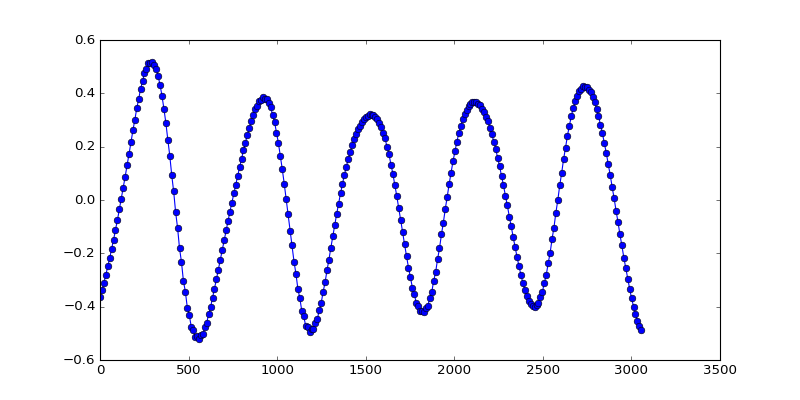

In [77]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(len(transit_times)),transit_times)
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
diff = (np.arange(len(transit_times))*slope + intercept) - np.asarray(transit_times)
diff_in_days = diff*365/(2*np.pi) #multiply by 2pi, seconds in a year. Then divide by 60 for minutes.
ax.plot(transit_times*365./(2*np.pi), diff_in_days, marker="o")
#plt.xlim(0,1200)
plt.show()

In [39]:
for i in range(100):
    print "mine {a}".format(a=transit_times[i+1]*365./(2*np.pi) - transit_times[i]*365./(2*np.pi))
    print "them {a}".format(a=t1_times[i+1] - t1_times[i])

mine 10.9597159214
them 10.9266969783
mine 10.946246444
them 10.922850446
mine 10.9857434544
them 10.9240475725
mine 10.9646779069
them 10.9191082693
mine 11.0084020541
them 10.9216004817
mine 10.9806669116
them 10.9162505797
mine 11.0241097203
them 10.9190346529
mine 10.9916907236
them 10.9139475496
mine 11.0305431875
them 10.9162343294
mine 10.9959823281
them 10.9120709079
mine 11.0267474745
them 10.9132750055
mine 10.9927256361
them 10.9106844243
mine 11.0129407605
them 10.9104466412
mine 10.9820849722
them 10.9100846008
mine 10.9905708715
them 10.9082771818
mine 10.9652795679
them 10.9107075243
mine 10.9625529674
them 10.9074194398
mine 10.9445995926
them 10.9131678919
mine 10.9330437061
them 10.9086885436
mine 10.923037116
them 10.9180528817
mine 10.9063293098
them 10.9128901623
mine 10.9034623999
them 10.925822016
mine 10.8854387573
them 10.9206698873
mine 10.8878147504
them 10.9366012089
mine 10.8715139808
them 10.9323157865
mine 10.8768139543
them 10.9499780057
mine 10.86412293